# Pneumonia Prediction Using CNN

The World Health Organization (WHO) states that pneumonia is the leading cause of childhood mortality, responsible for approximately 2 million deaths annually in children under the age of five. It surpasses the combined death toll from HIV/AIDS, malaria, and measles.
Nearly 95% of new childhood pneumonia cases occur in developing regions, particularly in Southeast Asia and Africa. The primary causes are bacterial and viral pathogens, which require different treatments: bacterial pneumonia necessitates urgent antibiotic intervention, while viral pneumonia is managed with supportive care.

Timely and accurate diagnosis is crucial. Chest X-rays are a key diagnostic tool, as they are commonly used to help distinguish between bacterial and viral pneumonia. However, access to rapid radiologic interpretation is limited in low-resource settings, where pneumonia incidence and mortality are highest.

A reliable method for classifying pediatric chest X-rays to detect pneumonia and differentiate between viral and bacterial cases could significantly improve timely referrals and ensure children receive appropriate and urgent care.

### Importing Required Libraries

In [331]:
import numpy as np
import pandas as pd
import os
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras.optimizers.legacy import Adam
from tensorflow.keras.regularizers import l2
from tensorflow.keras.applications import EfficientNetB0
from tensorflow.keras.layers import Conv2D, MaxPool2D, Flatten, Dense, Dropout, BatchNormalization, GlobalAveragePooling2D
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing.image import img_to_array

### Train Data Generator

In [333]:
tf.random.set_seed(42)

In [334]:
train_datagen = ImageDataGenerator(rescale = 1./255,
                                   rotation_range = 20,
                                   width_shift_range = 0.2,
                                   height_shift_range = 0.2,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True,
                                   vertical_flip = True,
                                   fill_mode = 'nearest')

In [335]:
train_path = 'chest_xray/train'

In [336]:
train_generator = train_datagen.flow_from_directory(train_path, 
                                                    target_size = (300, 300),
                                                    batch_size = 128,
                                                    class_mode = 'binary')

Found 5216 images belonging to 2 classes.


In [337]:
train_generator.class_indices

{'NORMAL': 0, 'PNEUMONIA': 1}

### Test and Validation Data Generator

In [339]:
test_datagen = ImageDataGenerator(rescale = 1. / 255)

test_path = 'chest_xray/test'

test_generator = test_datagen.flow_from_directory(test_path,
                                                  target_size = (300, 300),
                                                  batch_size = 128,
                                                  class_mode = 'binary')

Found 624 images belonging to 2 classes.


In [340]:
val_path = 'chest_xray/val'

val_generator = test_datagen.flow_from_directory(val_path,
                                                 target_size = (300, 300),
                                                 batch_size = 128,
                                                 class_mode = 'binary')

Found 16 images belonging to 2 classes.


## Taking look over the images

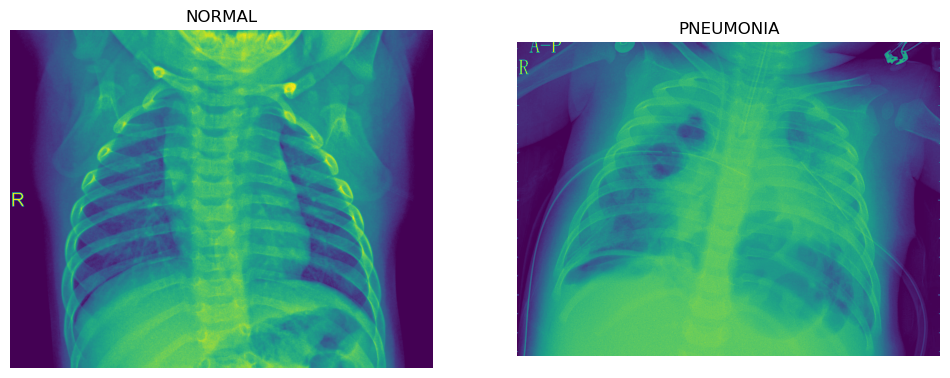

In [342]:
categories = ['NORMAL', 'PNEUMONIA']

plt.figure(figsize = (12, 10))

for i,category in enumerate(categories):
    folder_path = os.path.join(train_path, category)
    image_path = os.path.join(folder_path, os.listdir(folder_path)[10])
    img = plt.imread(image_path)
    plt.subplot(1, 2, i+1)
    plt.title(category)
    plt.axis('off')
    plt.imshow(img)

plt.savefig('Normal_Vs_Pneumonia.png', dpi = 300)
plt.show()

## Building the model

In [344]:
base_model = EfficientNetB0(weights='imagenet', include_top=False, input_shape=(300, 300, 3))
base_model.trainable = False  # Freeze the base model to retain pre-trained weights


In [365]:
model = tf.keras.Sequential([
    Conv2D(16, (3,3), activation = 'relu', input_shape = (300, 300,3)),
    MaxPool2D(2,2),
    Conv2D(32, (3,3), activation = 'relu'),
    MaxPool2D(2,2),
    Conv2D(64, (3,3), activation = 'relu'),
    MaxPool2D(2,2),
    Conv2D(128, (3,3), activation = 'relu'),
    MaxPool2D(2,2),
    Conv2D(128, (3,3), activation = 'relu'),
    MaxPool2D(2,2),
    Flatten(),
    Dense(256, activation = 'relu'),
    Dropout(0.1),
    Dense(512, activation = 'relu'),
    Dropout(0.1),
    Dense(1, activation = 'sigmoid')
])

model.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])
model.summary()
    

Model: "sequential_15"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_51 (Conv2D)          (None, 298, 298, 16)      448       
                                                                 
 max_pooling2d_51 (MaxPoolin  (None, 149, 149, 16)     0         
 g2D)                                                            
                                                                 
 conv2d_52 (Conv2D)          (None, 147, 147, 32)      4640      
                                                                 
 max_pooling2d_52 (MaxPoolin  (None, 73, 73, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_53 (Conv2D)          (None, 71, 71, 64)        18496     
                                                                 
 max_pooling2d_53 (MaxPoolin  (None, 35, 35, 64)     

### Training the model

In [367]:
history = model.fit(train_generator, epochs = 50, validation_data = val_generator)

Epoch 1/50


2024-12-18 16:54:26.864274: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype int32
	 [[{{node Placeholder/_0}}]]


41/41 [==============================] - ETA: 0s - loss: 0.5187 - accuracy: 0.7596

2024-12-18 16:56:20.488689: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype int32
	 [[{{node Placeholder/_0}}]]


41/41 [==============================] - 114s 3s/step - loss: 0.5187 - accuracy: 0.7596 - val_loss: 0.8674 - val_accuracy: 0.6250
Epoch 2/50
41/41 [==============================] - 123s 3s/step - loss: 0.3428 - accuracy: 0.8541 - val_loss: 0.6807 - val_accuracy: 0.6250
Epoch 3/50
41/41 [==============================] - 126s 3s/step - loss: 0.2834 - accuracy: 0.8779 - val_loss: 0.8723 - val_accuracy: 0.6875
Epoch 4/50
41/41 [==============================] - 126s 3s/step - loss: 0.2743 - accuracy: 0.8859 - val_loss: 0.8848 - val_accuracy: 0.6875
Epoch 5/50
41/41 [==============================] - 128s 3s/step - loss: 0.2822 - accuracy: 0.8802 - val_loss: 0.5740 - val_accuracy: 0.6250
Epoch 6/50
41/41 [==============================] - 129s 3s/step - loss: 0.2563 - accuracy: 0.8886 - val_loss: 1.0957 - val_accuracy: 0.6250
Epoch 7/50
41/41 [==============================] - 130s 3s/step - loss: 0.2541 - accuracy: 0.8963 - val_loss: 1.0748 - val_accuracy: 0.6250
Epoch 8/50
41/41 [======

In [359]:
#Evaluate on the training set
train_loss, train_accuracy = model.evaluate(train_generator)

2024-12-18 16:51:35.206823: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype int32
	 [[{{node Placeholder/_0}}]]


41/41 [==============================] - 82s 2s/step - loss: 0.2115 - accuracy: 0.9082


In [360]:
# Evaluate on the validation set
val_loss, val_accuracy = model.evaluate(val_generator)
print(val_accuracy)

1/1 [==============================] - 0s 156ms/step - loss: 0.5520 - accuracy: 0.6875
0.6875


2024-12-18 16:52:57.422735: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype int32
	 [[{{node Placeholder/_0}}]]
